In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font face="Arial" size="5">Загрузка данных </font>

In [92]:
train = pd.read_csv('shift_ml_2025_train.csv', low_memory=False)
target = train['итоговый_статус_займа']


In [93]:
train.shape[0]

1210779

In [94]:
train.head(5)

,id,сумма_займа,срок_займа,процентная_ставка,аннуитет,рейтинг,допрейтинг,профессия_заемщика,стаж,владение_жильем,...,процент_счетов_прев_75_лимита,кол-во_публ_банкротств,кол-во_залогов,кредитный_лимит,кредитный_баланс_без_ипотеки,лимит_по_картам,лимит_по_аннуитетным_счетам,кредитный_баланс_по_возоб_счетам,особая_ситуация,тип_предоставления_кредита
0,68355089,1235000.0,3 года,11.99,41014.0,В,В1,инженер,10+ лет,ИПОТЕКА,...,7.7,0.0,0.0,15700850.0,1973750.0,3965000.0,1233350.0,NaN,Нет,Наличные
1,68341763,1000000.0,5 лет,10.78,21633.0,Б,Б4,водитель грузовика,10+ лет,ИПОТЕКА,...,50.0,0.0,0.0,10920900.0,934800.0,310000.0,743850.0,NaN,Нет,Наличные
2,68426831,597500.0,3 года,13.44,20259.0,В,В3,ветеринарный техник,4 года,АРЕНДА,...,100.0,0.0,0.0,845000.0,639900.0,470000.0,200000.0,NaN,Нет,Наличные
3,68476668,1000000.0,3 года,9.17,31879.0,Б,Б2,вице-президент операций по набору персонала,10+ лет,ИПОТЕКА,...,100.0,0.0,0.0,19442600.0,5838100.0,1575000.0,2322600.0,NaN,Нет,Наличные
4,67275481,1000000.0,3 года,8.49,31563.0,Б,Б1,дорожному водителю,10+ лет,ИПОТЕКА,...,0.0,0.0,0.0,9669500.0,1396850.0,725000.0,1807200.0,NaN,Нет,Наличные


In [95]:
train.describe()

,id,сумма_займа,процентная_ставка,аннуитет,годовой_доход,итоговый_статус_займа,рейтинг_OCR,коэфф_акционных_зачислений_в_остатке,кол_во_субсидий_за_год,индекс_проживания,...,кол-во_счетов_за_посл_год,процент_счетов_без_просрочек,процент_счетов_прев_75_лимита,кол-во_публ_банкротств,кол-во_залогов,кредитный_лимит,кредитный_баланс_без_ипотеки,лимит_по_картам,лимит_по_аннуитетным_счетам,кредитный_баланс_по_возоб_счетам
count,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210778e+06,...,1.150012e+06,1.149877e+06,1.155448e+06,1.210161e+06,1.210745e+06,1.150012e+06,1.168297e+06,1.168297e+06,1.150012e+06,16808.000000
mean,5.634301e+07,7.210352e+05,1.323988e+01,2.190478e+04,1.525304e+06,1.996186e-01,2.499915e+00,5.000210e-01,3.009005e-01,5.155637e+02,...,2.179134e+00,9.416231e+01,4.513966e+01,1.344334e-01,5.221413e-02,8.723506e+06,2.483355e+06,1.082325e+06,2.106562e+06,31479.386066
std,3.836485e+07,4.358215e+05,4.767252e+00,1.307606e+04,1.401176e+06,3.997138e-01,1.117855e+00,2.887665e-01,1.006824e+00,3.125548e+02,...,1.846157e+00,8.745308e+00,3.600162e+01,3.781301e-01,3.996778e-01,8.908827e+06,2.387537e+06,1.078610e+06,2.164373e+06,26599.396961
min,5.571600e+04,2.500000e+04,5.310000e+00,2.465000e+02,0.000000e+00,0.000000e+00,1.000000e+00,6.667677e-07,0.000000e+00,7.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000711e+07,4.000000e+05,9.750000e+00,1.242400e+04,9.152000e+05,0.000000e+00,2.000000e+00,2.498734e-01,0.000000e+00,2.340000e+02,...,1.000000e+00,9.130000e+01,1.000000e+01,0.000000e+00,0.000000e+00,2.482050e+06,1.044150e+06,3.900000e+05,7.365500e+05,13795.500000
50%,5.773418e+07,6.000000e+05,1.274000e+01,1.877150e+04,1.300000e+06,0.000000e+00,2.000000e+00,5.004653e-01,0.000000e+00,4.800000e+02,...,2.000000e+00,9.800000e+01,4.290000e+01,0.000000e+00,0.000000e+00,5.623025e+06,1.865200e+06,7.550000e+05,1.583950e+06,24660.500000
75%,8.454664e+07,1.000000e+06,1.599000e+01,2.902200e+04,1.800000e+06,0.000000e+00,3.000000e+00,7.498166e-01,0.000000e+00,8.050000e+02,...,3.000000e+00,1.000000e+02,7.500000e+01,0.000000e+00,0.000000e+00,1.260445e+07,3.127100e+06,1.405000e+06,2.831450e+06,40718.250000
max,1.456364e+08,2.000000e+06,3.099000e+01,8.599150e+04,2.199840e+08,1.000000e+00,4.000000e+00,9.999984e-01,5.000000e+00,9.990000e+02,...,3.200000e+01,1.000000e+02,1.000000e+02,1.200000e+01,8.500000e+01,5.000000e+08,1.704048e+08,5.527500e+07,1.050956e+08,309613.000000


<font face="Arial" size="5">Обработка данных </font>

In [96]:
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210779 entries, 0 to 1210778
Data columns (total 109 columns):
 #    Column                                                            Non-Null Count    Dtype  
---   ------                                                            --------------    -----  
 0    id                                                                1210779 non-null  int64  
 1    сумма_займа                                                       1210779 non-null  float64
 2    срок_займа                                                        1210779 non-null  object 
 3    процентная_ставка                                                 1210779 non-null  float64
 4    аннуитет                                                          1210779 non-null  float64
 5    рейтинг                                                           1210779 non-null  object 
 6    допрейтинг                                                        1210779 non-null  object 
 7  

In [97]:
#работа с дублями
print(f'В наборе данных имеется {train.duplicated().sum()} дублей.')
train.loc[train.duplicated()]

В наборе данных имеется 0 дублей.


,id,сумма_займа,срок_займа,процентная_ставка,аннуитет,рейтинг,допрейтинг,профессия_заемщика,стаж,владение_жильем,...,процент_счетов_прев_75_лимита,кол-во_публ_банкротств,кол-во_залогов,кредитный_лимит,кредитный_баланс_без_ипотеки,лимит_по_картам,лимит_по_аннуитетным_счетам,кредитный_баланс_по_возоб_счетам,особая_ситуация,тип_предоставления_кредита


In [98]:
lst_columns=list(train.columns)[1:]


In [99]:
# проверка уникальных значений каждого признака
for col in lst_columns:
    print(f'--признак {col}--')
    print(train[col].unique())
    print(f'----'*10)



--признак сумма_займа--
[1235000. 1000000.  597500. ... 1817500. 1872500. 1836250.]
----------------------------------------
--признак срок_займа--
['3 года' '5 лет']
----------------------------------------
--признак процентная_ставка--
[11.99 10.78 13.44  9.17  8.49  6.49 11.48 12.88 19.48  7.49 19.89 14.85
  5.32 17.97 24.24 13.99 15.77  9.8  17.27 18.49  7.91 23.13 16.59 20.5
 18.99 26.06 22.45 21.48  6.99 27.49 26.99 27.99 28.49 25.09  6.   28.99
 16.55 13.67 17.86 14.48 10.64 13.18  6.24  7.26  8.38 15.41  9.76 21.99
 16.99 25.99 12.59 17.57  7.89  6.89 18.2  11.22 19.99 27.31 20.99 27.88
 23.99 22.99 24.99 26.77  8.18  9.99 11.49 10.99 14.33 12.05 16.9  11.53
 18.55 14.65 13.33 12.69 18.25 19.19 12.29 15.61 25.78 19.52  6.39  5.93
  6.92  6.68 21.67 20.49 25.8  18.84 24.5  25.57 25.83 25.89  8.67 14.99
 17.14  8.19 10.49 11.44  6.03 12.39  9.49 13.66 14.31 12.99 15.99 15.59
 19.24 16.49 18.54  7.34 11.98 21.85 20.39  9.43  5.31  6.07 14.07 15.04
 18.45 10.9  13.58 17.47 16.01  7

In [100]:
for col in ['особая_ситуация', 
'код_политики', 'непогашенная_сумма_из_тела_займов','коэфф_невыплаченного_сумм_остатка',
'платежный_график' ]:
    print(f'--признак {col}--')
    print(train[col].unique())
    print(f'----'*10)


--признак особая_ситуация--
['Нет']
----------------------------------------
--признак код_политики--
[1.]
----------------------------------------
--признак непогашенная_сумма_из_тела_займов--
[0.]
----------------------------------------
--признак коэфф_невыплаченного_сумм_остатка--
[1345311.53813176]
----------------------------------------
--признак платежный_график--
['n']
----------------------------------------


In [101]:
# признаки где всего одно неинформативное значение удаляем 

train.drop(['особая_ситуация','код_политики', 'непогашенная_сумма_из_тела_займов','коэфф_невыплаченного_сумм_остатка',
'платежный_график' ], axis=1, inplace=True)


In [102]:
# заполним nan в категориальных признаках
# профессия_заемщика                            
# стаж
# пени_за_дефолт                                    
# тип_займа
# совокупный_статус_подтверждения_доходов_заемщиков

train.fillna({'стаж': "0",
            'профессия_заемщика': "нет профессии",
            'пени_за_дефолт': False,
            'тип_займа': "нет значения",
            'совокупный_статус_подтверждения_доходов_заемщиков': "Не подтвержден"
}, inplace=True
            )

/var/folders/rf/wn5m3xj17w7_mv4s7bxqtmx80000gn/T/ipykernel_11591/1582048783.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.fillna({'стаж': "0",


<font face="Arial" size="5">EDA </font>

In [103]:
from scipy.stats import (shapiro, kstest,
                         ks_2samp, anderson,
                         jarque_bera,
                         ttest_ind,
                         mannwhitneyu,
                         kruskal, spearmanr)

In [104]:
#  в отдельный список запишем непрерывные признаки

lst_cont=['итоговый_статус_займа', 'процентная_ставка',  'сумма_займа',  
          'аннуитет', 'нижний_порог_рейтинга_заемщика', 'верхний_порог_рейтинга_заемщика', 'пени_за_дефолт',
          'кол-во_открытых_счетов_за_2_года', 'кол-во_счетов_за_посл_год']

Проверим непрерывные признаки на аномальные значения

In [105]:
train[lst_cont].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

,итоговый_статус_займа,процентная_ставка,сумма_займа,аннуитет,нижний_порог_рейтинга_заемщика,верхний_порог_рейтинга_заемщика,кол-во_открытых_счетов_за_2_года,кол-во_счетов_за_посл_год
count,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.168297e+06,1.150012e+06
mean,1.996186e-01,1.323988e+01,7.210352e+05,2.190478e+04,6.961770e+02,7.001772e+02,4.694292e+00,2.179134e+00
std,3.997138e-01,4.767252e+00,4.358215e+05,1.307606e+04,3.186001e+01,3.186066e+01,3.188871e+00,1.846157e+00
min,0.000000e+00,5.310000e+00,2.500000e+04,2.465000e+02,6.250000e+02,6.290000e+02,0.000000e+00,0.000000e+00
1%,0.000000e+00,5.320000e+00,7.500000e+04,2.648000e+03,6.600000e+02,6.640000e+02,0.000000e+00,0.000000e+00
5%,0.000000e+00,6.490000e+00,1.600000e+05,5.437000e+03,6.600000e+02,6.640000e+02,1.000000e+00,0.000000e+00
25%,0.000000e+00,9.750000e+00,4.000000e+05,1.242400e+04,6.700000e+02,6.740000e+02,2.000000e+00,1.000000e+00
50%,0.000000e+00,1.274000e+01,6.000000e+05,1.877150e+04,6.900000e+02,6.940000e+02,4.000000e+00,2.000000e+00
75%,0.000000e+00,1.599000e+01,1.000000e+06,2.902200e+04,7.100000e+02,7.140000e+02,6.000000e+00,3.000000e+00
95%,1.000000e+00,2.215000e+01,1.646250e+06,4.818400e+04,7.600000e+02,7.640000e+02,1.100000e+01,6.000000e+00


Все значения выглядят адекватными, только в кол-во_открытых_счетов_за_2_года и	кол-во_счетов_за_посл_год 
открытые 64 и 32 счета кажутся аномальным явлением, можно обрезать по 99% перцинтилю 

In [106]:
train[lst_cont].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210779 entries, 0 to 1210778
Data columns (total 9 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   итоговый_статус_займа             1210779 non-null  int64  
 1   процентная_ставка                 1210779 non-null  float64
 2   сумма_займа                       1210779 non-null  float64
 3   аннуитет                          1210779 non-null  float64
 4   нижний_порог_рейтинга_заемщика    1210779 non-null  float64
 5   верхний_порог_рейтинга_заемщика   1210779 non-null  float64
 6   пени_за_дефолт                    1210779 non-null  bool   
 7   кол-во_открытых_счетов_за_2_года  1168297 non-null  float64
 8   кол-во_счетов_за_посл_год         1150012 non-null  float64
dtypes: bool(1), float64(7), int64(1)
memory usage: 75.1 MB


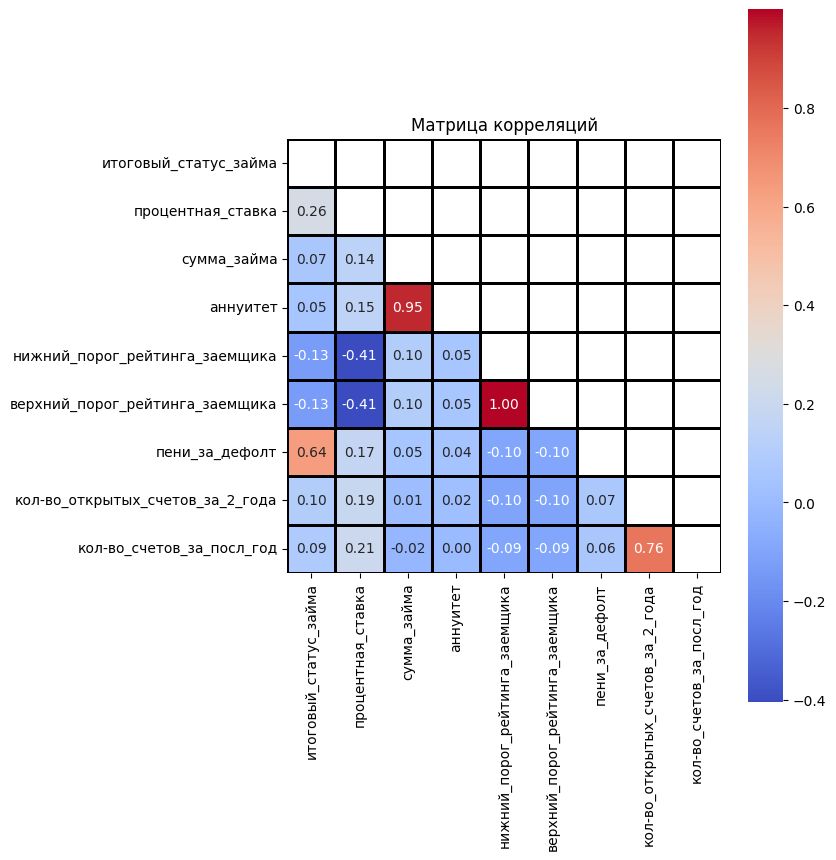

In [107]:
# Построим для непрерывных и номинальных признаков матрицу корреляций, чтобы проверить нет ли очевидных зависимостей
fig, ax = plt.subplots(figsize=(7,9))
ax = sns.heatmap(data = train[lst_cont].corr(),
                 annot=True,
                 square=True,
                 cmap='coolwarm',
                 fmt='.2f',
                 linewidths=1,
                 linecolor='black', 
                 mask=np.triu(train[lst_cont].corr())
                )
plt.title('Матрица корреляций')
plt.show()

Признаки 'кол-во_открытых_счетов_за_2_года' и 'кол-во_счетов_за_посл_год'   коллинеарны
Аналогично 'верхний_порог_рейтинга_заемщика' и нижний_порог_рейтинга_заемщика.
'Аннуитет' и 'сумма_займа' тоже зависимы, что логично, один из них можно будет убрать уз дальнейшего рассмотрения, пока оставим

In [108]:
train[['рейтинг','допрейтинг']].value_counts()


рейтинг  допрейтинг
В        В1            76885
Б        Б4            74965
         Б5            74394
         Б3            73444
В        В2            71404
         В3            67583
         В4            66958
Б        Б2            66645
         Б1            64082
В        В5            60756
А        А5            57764
         А4            47017
Г        Г1            46160
         Г2            40350
А        А1            39157
Г        Г3            35363
А        А3            34181
         А2            33402
Г        Г4            31955
         Г5            26886
Д        Д1            21378
         Д2            19253
         Д3            16596
         Д4            14184
         Д5            12983
Е        Е1             8987
         Е2             6457
         Е3             5483
         Е4             4353
         Е5             3562
Ж        Ж1             2690
         Ж2             1919
         Ж3             1457
         Ж4            

'допрейтинг' это более детализированный 'рейтинг', но оба пока оставляем

Cтоит внимательнее рассмотреть следующие пары признаков с относительно высоким коэффициентом корреляции из матрицы:
срок_займа и сумма_займа
срок_займа и процентная_ставка 
нижний_порог_рейтинга и процентная_ставка

In [109]:
train['срок_займа'].value_counts()

срок_займа
3 года    918586
5 лет     292193
Name: count, dtype: int64

In [110]:
train[train['срок_займа']=="3 года"]['сумма_займа'].mean()

627514.6257399961

In [111]:
train[train['срок_займа']=="5 лет"]['сумма_займа'].mean()

1015041.9799584522

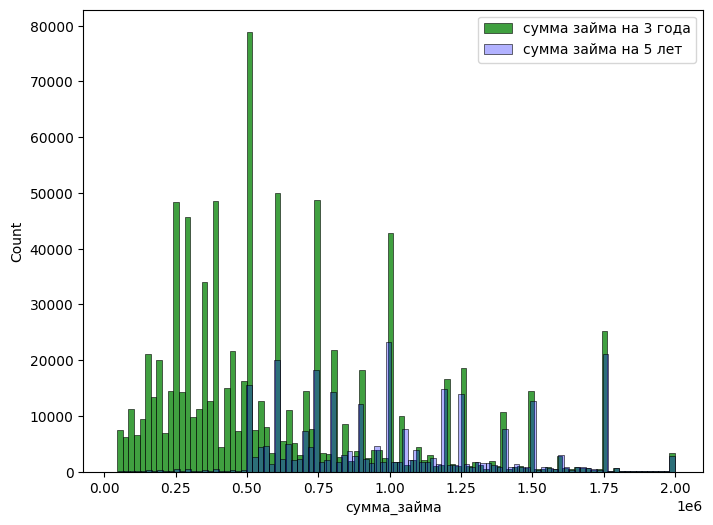

In [112]:

plt.figure(figsize=(8, 6))
# построим гистограммы и функции плотности
sns.histplot(data=train,
             x=train[train['срок_займа']=="3 года"]['сумма_займа'],
             color='green',
             label=f'сумма займа на 3 года',
             bins=100)
sns.histplot(data=train,
             x=train[train['срок_займа']=="5 лет"]['сумма_займа'],
             color='blue',
             label=f'сумма займа на 5 лет',
             bins=100,
             alpha=0.3)
plt.legend()

На гистограмме видно, что в среднем сумма займа на 5 лет, выше чем на 3 года

In [113]:
df1= train[train['срок_займа']=="5 лет"]
df2=train[train['срок_займа']=="3 года"]

In [114]:
print(df1.shape[0], df2.shape[0])

292193 918586


In [115]:
# классы не сбалансированны, займов на 5 лет в 3 раза меньше,  чем на 3 года
# поэтому случайно уменьшим вторую выбоку оставив 32%
df2=df2.sample(frac=0.32).reset_index()

In [116]:
print(df1.shape[0], df2.shape[0])

292193 293948


Проверим гипотезу, что разница между средней суммой займа на 3 года и на 5 лет статистически не значима

Для начала выдвинем следующие гипотезы

H_0: распределения случайных исследуемых величин не отличаются от нормального

H_1: распределения случайных исследуемых величин отличны от нормального

alfa=0.05

In [117]:
#используем критерий Колмагорова-Смирнова, чтобы проверить нормальное ли распределение имеют выборки
print(f'''
{kstest(df1['сумма_займа'], 'norm')}
{kstest(df2['сумма_займа'], 'norm')}
''')


KstestResult(statistic=1.0, pvalue=0.0, statistic_location=50000.0, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=25000.0, statistic_sign=-1)



pvalue=0.0 значит они не подчиняются нормальному закону

Теперь проверим нашу гипотезу применяя критерий Манна-Уитни - (гипотеза о равенстве выборочных средних или медиан) и Краскела-Уоллиса

H_0: разница между средней суммой займа на 3 года и на 5 лет статистически не значима

H_1: разница между средней суммой займа на 3 года и на 5 лет статистически значима

alpha = 0.05

In [118]:
print(f''' Критерий Манна-Уитни  и Краскела-Уоллиса

{mannwhitneyu(df1['сумма_займа'], df2['сумма_займа'])}
{kruskal(df1['сумма_займа'], df2['сумма_займа'])}
''')


 Критерий Манна-Уитни  и Краскела-Уоллиса

MannwhitneyuResult(statistic=66749708554.0, pvalue=0.0)
KruskalResult(statistic=135230.361123749, pvalue=0.0)



pvalue=0 < alpha = 0.05,

<font face="Arial" size="4" color="blue">Отвеграем нулевую гипотезу: разница суммы займа для кредита на 5 лет и на 3 года статистически значима. </font>

Теперь рассмотрим пару срок_займа и процентная_ставка

In [119]:
df1['процентная_ставка'].mean()

16.76355097486935

In [120]:
df2['процентная_ставка'].mean()

12.132559092084316

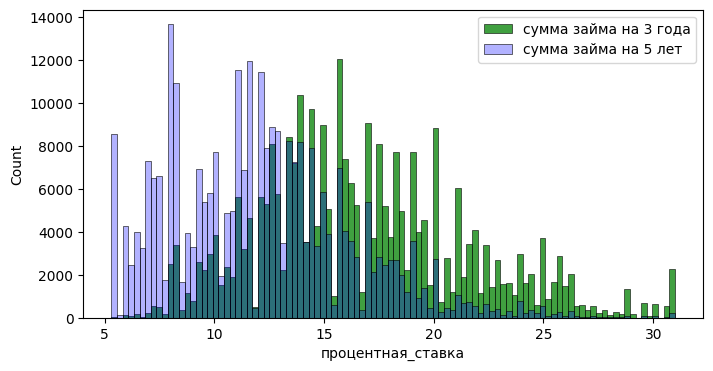

In [121]:
plt.figure(figsize=(8, 4))
# построим гистограммы и функции плотности
sns.histplot(data=train,
             x=df1['процентная_ставка'],
             color='green',
             label=f'сумма займа на 3 года',
             bins=100)
sns.histplot(data=train,
             x=df2['процентная_ставка'],
             color='blue',
             label=f'сумма займа на 5 лет',
             bins=100,
             alpha=0.3)
plt.legend()

Проверим гипотезу, что средняя процентная ставка на 3 года равна средней процентной ставке на 5 лет

Сначала выдвинем следующие гипотезы

H_0: распределения случайных исследуемых величин не отличаются от нормального

H_1: распределения случайных исследуемых величин отличны от нормального

alfa=0.05

In [122]:
#используем критерий Колмагорова-Смирнова, чтобы проверить нормальное ли распределение имеют выборки
print(f'''
{kstest(df1['процентная_ставка'], 'norm')}
{kstest(df2['процентная_ставка'], 'norm')}
''')


KstestResult(statistic=0.9999999451873826, pvalue=0.0, statistic_location=5.31, statistic_sign=-1)
KstestResult(statistic=0.9999999451873826, pvalue=0.0, statistic_location=5.31, statistic_sign=-1)



pvalue=0.0 значит обе последовательности отличны от нормального, гипотезу H_0 отвергаем

Теперь выдвинем следующие гипотезы:

Н_0: разница в процентной ставке для кредита на 5 лет и на 3 года статистически не значима

Н_1: разница в процентной ставке для кредита на 5 лет и на 3 года статистически  значима, то есть отличается


In [123]:
alpha = 0.05
# применим критерия Манна-Уитни - гипотеза о равенстве выборочных средних или медиан и Краскела-Уоллиса

print(f''' Критерий Манна-Уитни  и Краскела-Уоллиса

{mannwhitneyu(df1['процентная_ставка'], df2['процентная_ставка'])}
{kruskal(df1['процентная_ставка'], df2['процентная_ставка'])}
''')
#pvalue < alpha = 0.05,


 Критерий Манна-Уитни  и Краскела-Уоллиса

MannwhitneyuResult(statistic=66158240251.0, pvalue=0.0)
KruskalResult(statistic=128459.37254405461, pvalue=0.0)



<font face="Arial" size="4" color="blue">Отвергаем нулевую гипотезу: разница в процентной ставке для кредита на 5 лет и на 3 года статистически не значима. </font>

Теперь посмотрим зависимость процентной ставки от рейтинга, она должна быть т.к. есть корреляция между нижний_порог_рейтинга и процентная_ставка

In [124]:
t=train.groupby('рейтинг')['процентная_ставка'].agg('mean').reset_index()
t.columns=['rating','rate']
t

,rating,rate
0,А,7.115779
1,Б,10.679295
2,В,14.021103
3,Г,17.720314
4,Д,21.139280
5,Е,24.934547
6,Ж,27.712874


Text(0.5, 1.0, 'Распределение процентной ставки в зависимости от рейтинга')

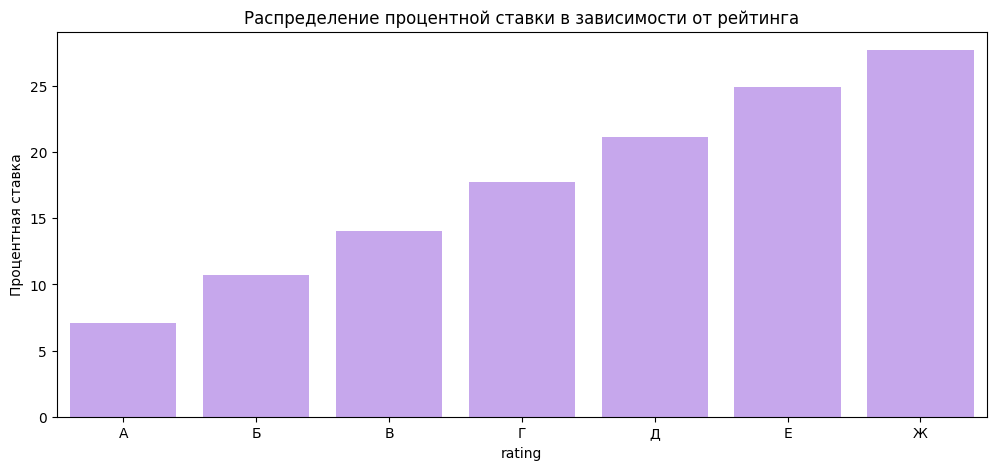

In [125]:
plt.figure(figsize=(12, 5))
ax=sns.barplot(x=t.rating,
               y=t.rate,
               color='#c59cf7')
ax.set_ylabel('Процентная ставка')
ax.set_title('Распределение процентной ставки в зависимости от рейтинга')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=75);

<font face="Arial" size="4" color="blue">Вывод: с понижением рейтинга (от А к Ж) процентная ставка увеличивается</font>

Также построим визуализацию для следующих признаков, которые влияют на целевой:
профессия_заемщика                                                
стаж                                                              
годовой_доход                                                                                                                              регион

In [126]:
#возьмем топ 20 самых популярных профессий среди клиентов банка
df_prof=train.groupby('профессия_заемщика')['итоговый_статус_займа'].agg(['mean','count']).sort_values(by='count',ascending=False).head(20).reset_index()
df_prof
df_prof['mean_percent']=df_prof['mean']* 100

/var/folders/rf/wn5m3xj17w7_mv4s7bxqtmx80000gn/T/ipykernel_11591/770659019.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75);


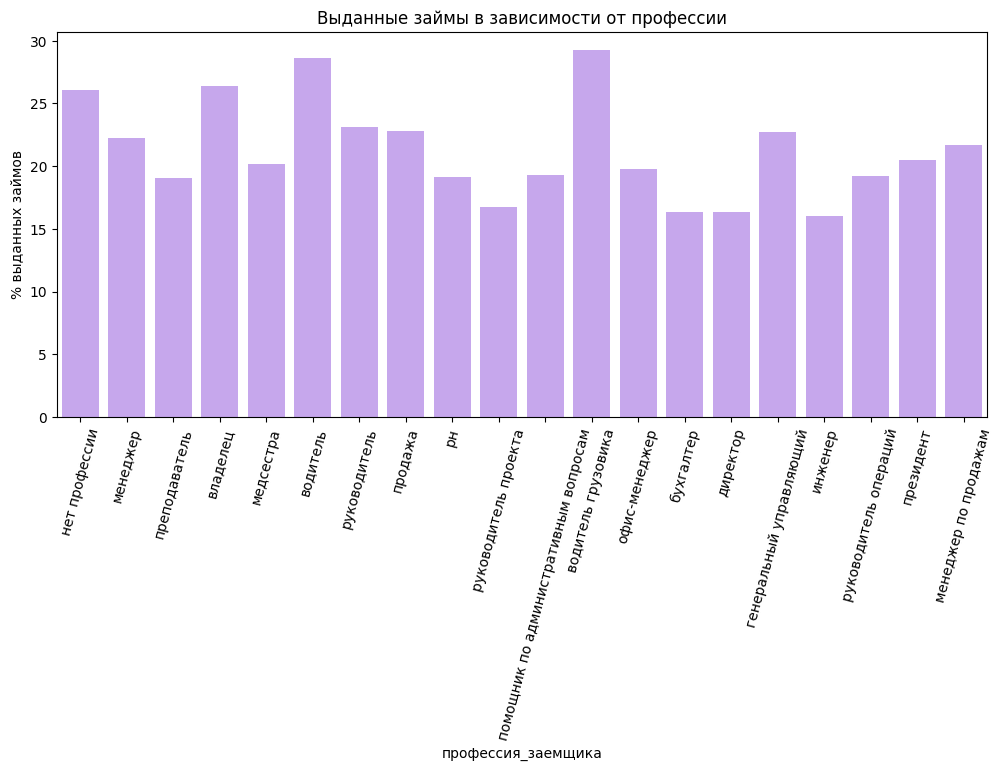

In [127]:
plt.figure(figsize=(12, 5))
ax=sns.barplot(x=df_prof['профессия_заемщика'],
               y=df_prof['mean_percent'],
               color='#c59cf7')
ax.set_ylabel('% выданных займов')
ax.set_title('Выданные займы в зависимости от профессии')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);

<font face="Arial" size="4" color="blue">Вывод: Указание профессии не влияет на процент выданных займов</font>

In [128]:
df_exp=train.groupby('стаж')['итоговый_статус_займа'].agg(['count','sum','mean']).reset_index()
df_exp.sort_values('стаж')

#в среднем займы выдаются ±20% клиентов вне зависимости от стажа

,стаж,count,sum,mean
0,0,70508,18907,0.268154
1,1 год,79652,16332,0.205042
2,10+ лет,398214,74826,0.187904
3,2 года,109469,21690,0.198138
4,3 года,96842,19316,0.199459
5,4 года,72444,14349,0.198070
6,5 лет,75707,14816,0.195702
7,6 лет,56522,10968,0.194048
8,7 лет,53633,10447,0.194787
9,8 лет,54635,10922,0.199908


In [129]:
# годовой_доход
train['revenue_group']=pd.qcut(train['годовой_доход'],5)
df_rg=train.groupby('revenue_group')['итоговый_статус_займа'].agg(['count','mean']).reset_index()
df_rg
train.drop(['revenue_group'], axis=1, inplace=True)

/var/folders/rf/wn5m3xj17w7_mv4s7bxqtmx80000gn/T/ipykernel_11591/562218141.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_rg=train.groupby('revenue_group')['итоговый_статус_займа'].agg(['count','mean']).reset_index()


/var/folders/rf/wn5m3xj17w7_mv4s7bxqtmx80000gn/T/ipykernel_11591/2288591346.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75);


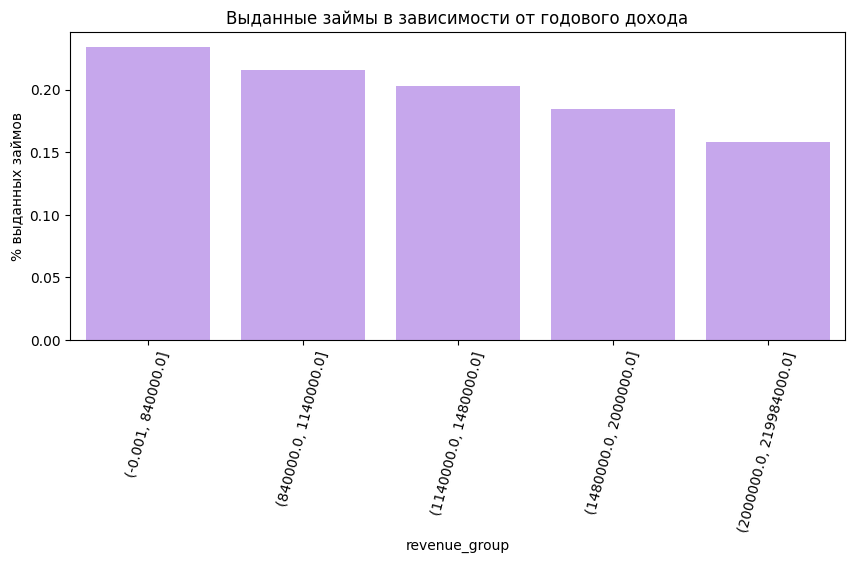

In [130]:
plt.figure(figsize=(10, 4))
ax=sns.barplot(x=df_rg['revenue_group'],
               y=df_rg['mean'],
               color='#c59cf7')
ax.set_ylabel('% выданных займов')
ax.set_title('Выданные займы в зависимости от годового дохода')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);

<font face="Arial" size="4" color="blue">Вывод:  С уменьшением дохода, выше процент выданных займов </font>

In [131]:
#возьмем топ 20 самых популярных регионов 
df_region=train.groupby('регион')['итоговый_статус_займа'].agg(['mean','count']).sort_values(by='count',ascending=False).head(20).reset_index()
df_region
df_region['mean_percent']=df_region['mean']* 100

/var/folders/rf/wn5m3xj17w7_mv4s7bxqtmx80000gn/T/ipykernel_11591/2739727239.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75);


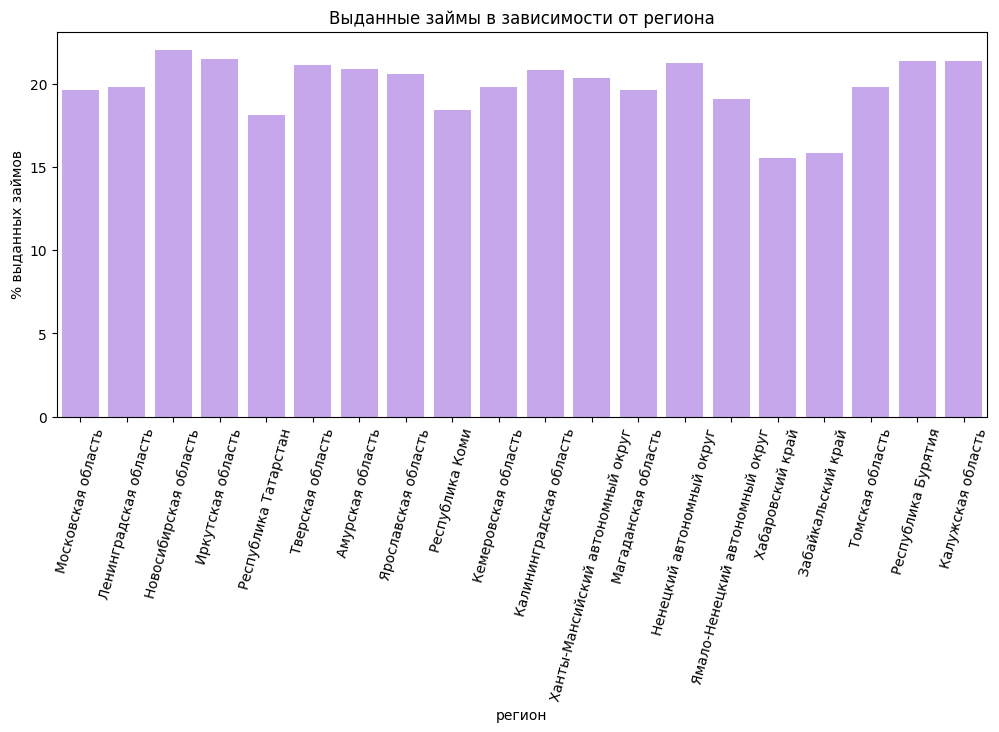

In [132]:
plt.figure(figsize=(12, 5))
ax=sns.barplot(x=df_region['регион'],
               y=df_region['mean_percent'],
               color='#c59cf7')
ax.set_ylabel('% выданных займов')
ax.set_title('Выданные займы в зависимости от региона')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);

<font face="Arial" size="4" color="blue">Вывод: Нет зависимости процента выданных займов от региона</font>

In [133]:
train.groupby('владение_жильем')['итоговый_статус_займа'].agg(['mean','count']).sort_values(by='count',ascending=False).reset_index()

,владение_жильем,mean,count
0,ИПОТЕКА,0.172197,598993
1,АРЕНДА,0.231998,481061
2,СОБСТВЕННОСТЬ,0.206162,130291
3,ЛЮБОЕ,0.194553,257
4,ДРУГОЕ,0.195489,133
5,НЕТ,0.159091,44


In [134]:
# выгрузка файлов для построения визуализаций
df_region.to_csv('df_region.csv', index=False)

df_rg.to_csv('df_rg.csv', index=False)

df_prof.to_csv('df_prof.csv', index=False)

t.to_csv('t.csv', index=False)

<font face="Arial" size="5">Построим модель CatBoost со всеми признаками, не заполняя пробелы </font>

In [135]:
from sklearn.metrics import f1_score, accuracy_score, log_loss, roc_auc_score, classification_report, roc_curve, auc

In [136]:
# из признаков также исключаем id

X = list(set(train.columns) - set(['итоговый_статус_займа', 'id']))

# выбираем категориальные фичи вот таким способом
cat_features=train[X].select_dtypes(include='object').columns.tolist()


y = ['итоговый_статус_займа']

In [137]:
# CatBoost успешно справляется с пропущенными значениями, после первого результата модели точнее определим список фичей и заполним некоторые пробелы

In [138]:
# метрики за которыми будем следить log_loss, uplift, roc_auc 
def uplift(df,score,pct):
  exited_all = df['итоговый_статус_займа'].sum()
  df = df.sort_values(score,ascending=False)
  exited_found = df.head(round(len(df) * pct))['итоговый_статус_займа'].sum()
  return (exited_found / exited_all) / pct

def print_metrics(df,score):
    print(f'''
    log_loss: {log_loss(df['итоговый_статус_займа'],df[score])}
    uplift: {uplift(df,score,0.2)}
    roc_auc: {roc_auc_score(df['итоговый_статус_займа'],df[score])}
      ''')

In [139]:
from catboost import CatBoostClassifier

In [140]:
train[cat_features].info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210779 entries, 0 to 1210778
Data columns (total 16 columns):
 #   Column                                             Non-Null Count    Dtype 
---  ------                                             --------------    ----- 
 0   допрейтинг                                         1210779 non-null  object
 1   регион                                             1210779 non-null  object
 2   первоначальный_статус_займа                        1210779 non-null  object
 3   стаж                                               1210779 non-null  object
 4   цель_займа                                         1210779 non-null  object
 5   срок_займа                                         1210779 non-null  object
 6   пос_стоп_фактор                                    1210779 non-null  object
 7   тип_займа                                          1210779 non-null  object
 8   владение_жильем                                    1210779 non-null  obj

In [141]:
# выделим тренировочную, валидационную, и новую тестовую выборку, по которой будем смотреть результат метрики AUC
from sklearn.model_selection import train_test_split

train1, test1 = train_test_split(train,train_size=0.6,random_state=42,stratify=train['итоговый_статус_займа'])
val1, test1 = train_test_split(test1,train_size=0.5,random_state=42,stratify=test1['итоговый_статус_займа'])


In [142]:
 from catboost import Pool

train_data = Pool(data=train1[X],
                  label=train1[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val1[X],
                  label=val1[y],
                  cat_features=cat_features
                 )

# оставляем дефолтные параметры, будем выводить AUC при построении

params = {'verbose':100,
          'eval_metric':'AUC',
          'random_seed':42,
         'learning_rate':0.01}


In [143]:
model_сb = CatBoostClassifier(**params)
model_сb.fit(train_data,eval_set=valid_data)

0:	test: 0.8234050	best: 0.8234050 (0)	total: 817ms	remaining: 13m 36s
100:	test: 0.8548058	best: 0.8548058 (100)	total: 49.8s	remaining: 7m 23s
200:	test: 0.8579506	best: 0.8579506 (200)	total: 1m 35s	remaining: 6m 21s
300:	test: 0.8603446	best: 0.8603446 (300)	total: 2m 23s	remaining: 5m 34s
400:	test: 0.8618814	best: 0.8618814 (400)	total: 3m 13s	remaining: 4m 49s
500:	test: 0.8628744	best: 0.8628744 (500)	total: 3m 59s	remaining: 3m 58s
600:	test: 0.8635885	best: 0.8635885 (600)	total: 4m 48s	remaining: 3m 11s
700:	test: 0.8642273	best: 0.8642273 (700)	total: 5m 42s	remaining: 2m 25s
800:	test: 0.8649076	best: 0.8649076 (800)	total: 6m 30s	remaining: 1m 36s
900:	test: 0.8657181	best: 0.8657181 (900)	total: 7m 18s	remaining: 48.2s
999:	test: 0.8662739	best: 0.8662739 (999)	total: 8m 5s	remaining: 0us

bestTest = 0.8662738889
bestIteration = 999



In [144]:
test1['score_cat'] = model_сb.predict_proba(test1[X])[:,1]

In [145]:
# метрики для модели
print_metrics(test1,'score_cat')


    log_loss: 0.2897169644975329
    uplift: 3.2476882020728604
    roc_auc: 0.8656148822946242
      


In [146]:
# посмотрим что повлияло на модель в большей степени
df_fi=model_сb.get_feature_importance(prettified=True)
df_fi


,Feature Id,Importances
0,пени_за_дефолт,89.189637
1,сумма_выплат_по_просрочкам,1.554037
2,допрейтинг,1.269862
3,срок_займа,1.086109
4,рейтинг,0.941946
...,...,...
97,дата_следующей_выплаты,0.000000
98,рейтинг_OCR,0.000000
99,сумма_задолженности,0.000000
100,кол-во_текущих_просроченных_счетов,0.000000


In [147]:
df_fi.head(30)

,Feature Id,Importances
0,пени_за_дефолт,89.189637
1,сумма_выплат_по_просрочкам,1.554037
2,допрейтинг,1.269862
3,срок_займа,1.086109
4,рейтинг,0.941946
5,пдн,0.440281
6,профессия_заемщика,0.393729
7,годовой_доход,0.349068
8,стаж,0.347123
9,процентная_ставка,0.337704


In [148]:
# заполним пропуски, для признаков с высоким importance
train.fillna({'пдн': train['пдн'].mean(),
             'индекс_проживания':"000000"}, inplace=True
            )

In [149]:
# топ 10 верхних признаков внимательнее изучим
# сделаем признак профессия_заемщика бинарным

train.loc[train["профессия_заемщика"]=='нет профессии', 'есть_профессия'] = 0
train.loc[train["профессия_заемщика"]!='нет профессии', 'есть_профессия'] = 1
train['есть_профессия'].value_counts()

есть_профессия
1.0    1133730
0.0      77049
Name: count, dtype: int64

In [150]:
# разделим стаж на 3 категории вместо 10
train['стаж'].value_counts()

# для стажа можно уменьшить кол-во категорий до 3ех
def categorize_exp(value):
    if value=="0":
        return 'нет стажа'
    elif value in {"1 год", "< 1 года"}:
        return 'до года'
    else: return 'больше года'    
train['стаж_категория']=train['стаж'].apply(categorize_exp)

train['стаж_категория'].value_counts()

стаж_категория
больше года    963281
до года        176990
нет стажа       70508
Name: count, dtype: int64

In [151]:
# из дата_первого_займа выделим год, чтобы получился временной признак
from datetime import datetime
def year_first_credit(value):
    return str(value)[-4:]    
train['год_дата_первого_займа']=train['дата_первого_займа'].apply(year_first_credit)

train['год_дата_первого_займа'].astype('int')


0          1999
1          2000
2          1987
3          1990
4          1999
           ... 
1210774    2004
1210775    2002
1210776    2011
1210777    1997
1210778    1999
Name: год_дата_первого_займа, Length: 1210779, dtype: int64

In [152]:
# обработаем выбросы
from scipy.stats import mstats
train["сумма_выплат_по_просрочкам"] = mstats.winsorize(train["сумма_выплат_по_просрочкам"], limits=[0.01, 0.01])
train["процентная_ставка"] = mstats.winsorize(train["процентная_ставка"], limits=[0.01, 0.01])

In [153]:
df_fi[df_fi['Importances']<0.001]

,Feature Id,Importances
84,кол-во_взысканий_за_последний_год,0.000847
85,кол-во_месяцев_с_последнего_нарушения,0.000696
86,кол-во_мес_с_последней_задолженности_по_карте,0.000677
87,кол-во_месяцев_с_последнего_возобновляемого_счета,0.000562
88,кол-во_месяцев_с_последней_просрочки,0.000425
89,коэфф_исходного_платежа,0.000319
90,кол-во_счетов_без_нарушений,0.000246
91,кол-во_открытых_счетов,0.000241
92,грейд_на_детерминаторе,0.000185
93,возвраты_с_учетом_мпл,0.000150


In [154]:
# теперь удалим из модели признаки, которые не повлияли
train.drop(['кредитный_баланс_без_ипотеки', 'кол-во_счетов_с_акт_просрочкой_1_мес', 'сумма_задолженности',
                      'кол-во_счетов_без_нарушений', 'юридический_статус', 'кол-во_месяцев_с_последней_просрочки',
                      'кол-во_текущих_просроченных_счетов', 'кол-во_залогов', 'коэфф_исходного_платежа',
                      'дата_следующей_выплаты', 'грейд_на_детерминаторе','тип_предоставления_кредита','возвраты_с_учетом_мпл',
                      'кол_во_субсидий_за_год','коэфф_акционных_зачислений_в_остатке'], axis=1, inplace=True)

In [155]:
# удаляем стаж из признаков и дата_первого_займа, остается стаж_категория и год_дата_первого_займа

X = list(set(train.columns) - set(['итоговый_статус_займа', 'id', 'стаж', 'дата_первого_займа']))

# выбираем категориальные фичи 
cat_features=train[X].select_dtypes(include='object').columns.tolist()

train[cat_features]=train[cat_features].astype(str, errors='ignore')
y = ['итоговый_статус_займа']

In [156]:
# остальные пропуски заполним 0, это кажется логичным для остальных признаков
train.fillna(0, inplace=True)

In [157]:
#Exited целевая
train['итоговый_статус_займа'].value_counts(normalize=True)
# заем выдается  20% клиентов

итоговый_статус_займа
0    0.800381
1    0.199619
Name: proportion, dtype: float64

In [158]:
# еще раз обучаем модель
train1, test1 = train_test_split(train,train_size=0.6,random_state=42,stratify=train['итоговый_статус_займа'])
val1, test1 = train_test_split(test1,train_size=0.5,random_state=42,stratify=test1['итоговый_статус_займа'])
train_data = Pool(data=train1[X],
                  label=train1[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val1[X],
                  label=val1[y],
                  cat_features=cat_features
                 )

# добавляем доп параметры для лучшего построения, балансировка классов 'scale_pos_weight':4 
params = {'iterations':2000,
          'verbose':100,
          'eval_metric':'AUC',
          'random_seed':42,
         'learning_rate':0.04,
         'depth':7,
         'l2_leaf_reg':4,
         'random_strength':0.5,
         'early_stopping_rounds':100,
         'scale_pos_weight':4}
model_сb = CatBoostClassifier(**params)
model_сb.fit(train_data,eval_set=valid_data)

0:	test: 0.8491192	best: 0.8491192 (0)	total: 618ms	remaining: 20m 34s
100:	test: 0.8626057	best: 0.8626057 (100)	total: 56.2s	remaining: 17m 36s
200:	test: 0.8670370	best: 0.8670370 (200)	total: 1m 55s	remaining: 17m 13s
300:	test: 0.8690822	best: 0.8690822 (300)	total: 3m 2s	remaining: 17m 10s
400:	test: 0.8700945	best: 0.8700945 (400)	total: 4m 9s	remaining: 16m 36s
500:	test: 0.8708525	best: 0.8708525 (500)	total: 5m 19s	remaining: 15m 55s
600:	test: 0.8713627	best: 0.8713627 (600)	total: 6m 43s	remaining: 15m 40s
700:	test: 0.8717411	best: 0.8717411 (700)	total: 7m 43s	remaining: 14m 19s
800:	test: 0.8720041	best: 0.8720042 (799)	total: 8m 49s	remaining: 13m 12s
900:	test: 0.8722460	best: 0.8722460 (900)	total: 9m 51s	remaining: 12m 1s
1000:	test: 0.8724561	best: 0.8724561 (1000)	total: 10m 53s	remaining: 10m 52s
1100:	test: 0.8725662	best: 0.8725666 (1099)	total: 11m 56s	remaining: 9m 44s
1200:	test: 0.8726440	best: 0.8726460 (1196)	total: 12m 56s	remaining: 8m 36s
1300:	test: 0.

In [159]:
test1['score_cat'] = model_сb.predict_proba(test1[X])[:,1]

In [160]:
# метрики для модели
print_metrics(test1,'score_cat')


    log_loss: 0.3826272029286134
    uplift: 3.291338256894019
    roc_auc: 0.8724870460290002
      


итоговый результат
bestTest = 0.8730719197
bestIteration = 1519
log_loss: 0.38443594504815887
    uplift: 3.288028300130329
    roc_auc: 0.8724974858662906

<font face="Arial" size="5" > Обучим еще одну модель с помощью LightGBM </font>

В нашей задаче более миллиона записей, поэтому еще попробуем LightGBM т.к. он подходит для работы с большими наборами данных 

In [161]:
pip install lightgbm


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [162]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [163]:
lst_cont=list(set(train.columns) - set(['итоговый_статус_займа', 'id', 'стаж', 'дата_первого_займа'])-set(cat_features))
for col in lst_cont:
    train1[col] = train1[col].astype(float)
    val1[col] = val1[col].astype(float)
    test1[col] = test1[col].astype(float)

In [164]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for col in cat_features:
    train1[col] = labelencoder.fit_transform(train1[col])
    val1[col] = labelencoder.fit_transform(val1[col])
    test1[col] = labelencoder.fit_transform(test1[col])

for col in cat_features:
    train1[col] = train1[col].astype('int')
    val1[col] = val1[col].astype('int')
    test1[col] = test1[col].astype('int')    

train_data = lgb.Dataset(train1[X], 
                         label=train1[y], 
                         categorical_feature=cat_features, 
                         free_raw_data=False)
valid_data = lgb.Dataset(val1[X], 
                        label=val1[y], 
                        categorical_feature=cat_features, 
                        free_raw_data=False)

In [165]:
params = {
    'verbose':100,
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.03,
    'feature_fraction': 0.9
}

In [166]:
# fitting the model
model_lgb = lgb.train(params,
                 train_set=train_data,
                 valid_sets=valid_data)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 145016, number of negative: 581451
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.819197
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.407406
[LightGBM] [Debug] init for col-wise cost 0.043775 seconds, init for row-wise cost 0.106099 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 16647
[LightGBM] [Info] Number of data points in the train set: 726467, number of used features: 88
[LightGBM] [Info] [binary:BoostFromSco

In [167]:
test1['score_lgbm'] = model_lgb.predict(test1[X])

In [168]:
print_metrics(test1,'score_lgbm')


    log_loss: 0.30168010828962577
    uplift: 3.2017625519766644
    roc_auc: 0.8563647819797262
      


Эта модель обучилась гораздо быстрее, чем CatBoost модель. Но roc_auc  меньше, чем у модели CatBoost

<font face="Arial" size="5" > Обучим еще одну модель с помощью XGBoost </font>

In [169]:
pip install xgboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [170]:
from xgboost import XGBClassifier

In [171]:
model_xgb = XGBClassifier()
model_xgb.fit(train1[X], train1[y])

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [172]:
test1['score_xgb'] = model_xgb.predict_proba(test1[X])[:,1]

In [173]:
print_metrics(test1,'score_xgb')


    log_loss: 0.2903793139337954
    uplift: 3.2455160429466887
    roc_auc: 0.8643977487781641
      


Результат близок к предыдущим моделям, и модель обучилась гораздо быстрее чем CatBoost

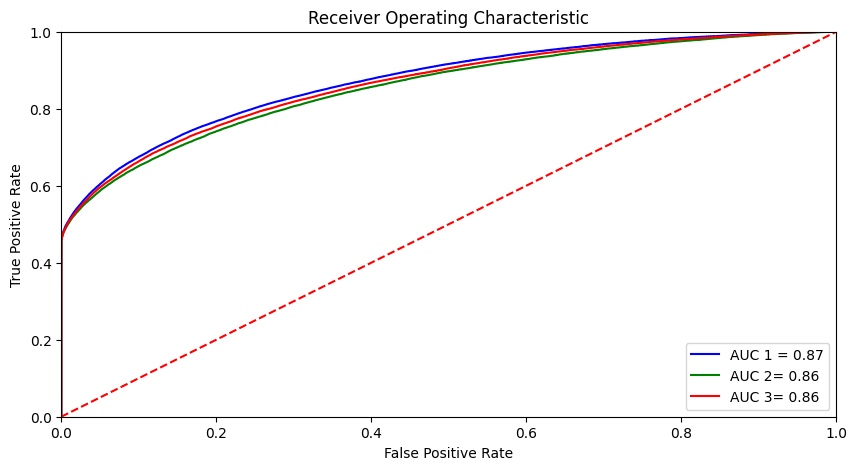

In [174]:
# построим кривую ROC для всех моделей

# fprs, tprs, thrs = roc_curve(val1['итоговый_статус_займа'],val1['score_cat'])
# roc = pd.DataFrame({'fpr':fprs,'tpr':tprs,'thr':thrs})
# roc['random'] = roc['fpr'] #диагональ для лучшей визуализации
# roc.plot(x='fpr',y=['tpr','random'],figsize=(6,6),grid=True)
# # roc.set_index('fpr')['tpr'].plot(figsize=(6,6))
plt.figure(figsize=(10, 5))
fpr, tpr, threshold = roc_curve(test1['итоговый_статус_займа'],test1['score_cat'])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC 1 = %0.2f' % roc_auc)
fpr, tpr, threshold = roc_curve(test1['итоговый_статус_займа'],test1['score_lgbm'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label = 'AUC 2= %0.2f' % roc_auc)
fpr, tpr, threshold = roc_curve(test1['итоговый_статус_займа'],test1['score_xgb'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'r', label = 'AUC 3= %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Вывод: Модель на CatBoost показала наилучший результат, ее будем использовать для прогноза test

Сделаем предсказание для test

In [175]:
test = pd.read_csv('shift_ml_2025_test.csv')

In [176]:
# Предобработаем данные из test, аналогично как мы делали на train
test.fillna({'стаж': "0", 
            'профессия_заемщика': "нет профессии",
            'пени_за_дефолт': False,
            'тип_займа': "нет значения",
            'совокупный_статус_подтверждения_доходов_заемщиков': "Не подтвержден", 
              'пдн': test['пдн'].mean(),
             'индекс_проживания':"000000"},inplace=True)

test.fillna(0, inplace=True)

test.loc[test["профессия_заемщика"]=='нет профессии', 'есть_профессия'] = 0
test.loc[test["профессия_заемщика"]!='нет профессии', 'есть_профессия'] = 1


def categorize_exp(value):
    if value=="0":
        return 'нет стажа'
    elif value in {"1 год", "< 1 года"}:
        return 'до года'
    else: return 'больше года'    
test['стаж_категория']=test['стаж'].apply(categorize_exp)


from datetime import datetime
def year_first_credit(value):
    return str(value)[-4:]    
test['год_дата_первого_займа']=test['дата_первого_займа'].apply(year_first_credit)
test['год_дата_первого_займа'].astype('int')


/var/folders/rf/wn5m3xj17w7_mv4s7bxqtmx80000gn/T/ipykernel_11591/3208151750.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test.fillna({'стаж': "0",


0         1995
1         1997
2         1992
3         2005
4         1996
          ... 
134526    1999
134527    1997
134528    2001
134529    1998
134530    2005
Name: год_дата_первого_займа, Length: 134531, dtype: int64

In [177]:
test[X].info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134531 entries, 0 to 134530
Data columns (total 88 columns):
 #   Column                                                            Non-Null Count   Dtype  
---  ------                                                            --------------   -----  
 0   кол-во_публ_банкротств                                            134531 non-null  float64
 1   есть_профессия                                                    134531 non-null  float64
 2   стаж_категория                                                    134531 non-null  object 
 3   общая_сумма_на_счетах                                             134531 non-null  float64
 4   лимит_по_картам                                                   134531 non-null  float64
 5   кол-во_месяцев_с_последнего_нарушения                             134531 non-null  float64
 6   кол-во_просрочек_за_два_года                                      134531 non-null  float64
 7   процентная_ставка   

In [178]:
test[cat_features]=test[cat_features].astype(str, errors='ignore')

X_test = test[X]

# Делаем предсказания
test_predict = model_сb.predict_proba(X_test)[:, 1]


test_predict

array([0.25941968, 0.08368504, 0.15457057, ..., 0.48193681, 0.35039666,
       0.28974311])

In [179]:
# Сохранение submission.csv
submission = pd.DataFrame({
'id': test['id'],
'proba': test_predict
})

submission.to_csv('submission.csv', index=False)